<a href="https://colab.research.google.com/github/deepenmi/pyTorchPractice/blob/master/LinearNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

# Define a model
We have three layers (500,1000,10). The last one is important, since we have 10 classes we need 10 output neurons.

In [16]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 =nn.Linear(784, 500) ## 784 is 28 * 28 and we have 500 nodes in input layer
    self.fc2 = nn.Linear(500,1000)
    self.fc3 = nn.Linear(1000,10)

  def forward(self,x):
    x = x.view(-1,784)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return F.log_softmax(x, dim=1)

# Data Loading
We use DataLoader andDataset torch util classes

In [9]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                                                 transforms.ToTensor(),
                                                 transforms.Normalize((0.1307,),(0.3081,))
                   ])),
                   batch_size=128, shuffle=True
)

In [11]:
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data',train=False, transform=transforms.Compose([
                                                                        transforms.ToTensor(),
                                                                        transforms.Normalize((0.1307,),(0.3081,))
    ])),
    batch_size=1000, shuffle=True
)

# Training and Testig Loops
Boilerplate coe for training and testing (almost never changes).

In [20]:
def train(model, device, train_loader, optimizer, epoch):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(device), target.to(device)
    optimizer.zero_grad()
    output = model(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % 100 ==0:
      print('Train Epoch:{} [{}/{} ({:.0f}%]\tLoss:{:.6f}'.format(
          epoch, batch_idx*len(data), len(train_loader.dataset),
          100. * batch_idx / len(train_loader), loss.item()
      ))

def test(model, device, test_loader):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      test_loss += F.nll_loss(output,target, reduction='sum').item()
      pred = output.argmax(dim=1, keepdim=True)
      correct+=pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average Loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100.*correct/len(test_loader.dataset)
    ))

In [21]:
use_cuda = torch.cuda.is_available()
torch.manual_seed(42)
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.5)

# Test before training

test(model, device, test_loader)

for epoch in range(1,3+1):
  train(model, device, train_loader, optimizer, epoch)
  test(model, device, test_loader)

torch.save(model.state_dict(),"mnist.pt")




Test set: Average Loss: 2.2889, Accuracy: 1131/10000 (11%)

Train Epoch:1 [0/60000 (0%]	Loss:2.289037
Train Epoch:1 [12800/60000 (21%]	Loss:0.332757
Train Epoch:1 [25600/60000 (43%]	Loss:0.359405
Train Epoch:1 [38400/60000 (64%]	Loss:0.216230
Train Epoch:1 [51200/60000 (85%]	Loss:0.153558

Test set: Average Loss: 0.1642, Accuracy: 9530/10000 (95%)

Train Epoch:2 [0/60000 (0%]	Loss:0.127502
Train Epoch:2 [12800/60000 (21%]	Loss:0.181071
Train Epoch:2 [25600/60000 (43%]	Loss:0.149213
Train Epoch:2 [38400/60000 (64%]	Loss:0.175571
Train Epoch:2 [51200/60000 (85%]	Loss:0.083897

Test set: Average Loss: 0.1150, Accuracy: 9655/10000 (97%)

Train Epoch:3 [0/60000 (0%]	Loss:0.105350
Train Epoch:3 [12800/60000 (21%]	Loss:0.066667
Train Epoch:3 [25600/60000 (43%]	Loss:0.073564
Train Epoch:3 [38400/60000 (64%]	Loss:0.027924
Train Epoch:3 [51200/60000 (85%]	Loss:0.131578

Test set: Average Loss: 0.0997, Accuracy: 9692/10000 (97%)



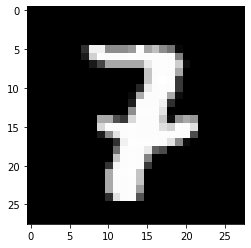

In [23]:
import matplotlib.pyplot as plt

test_image = test_loader.dataset.data[3848]
plt.imshow(test_image, cmap='gray')


In [25]:
out = model(test_image.float())

In [26]:
out

tensor([[ -827.8201,  -593.2245,  -327.7162,  -149.2835,  -701.1925, -1121.0844,
         -1030.3563,     0.0000,  -642.5305,  -765.3195]],
       grad_fn=<LogSoftmaxBackward>)

In [27]:
out.argmax(dim=1)

tensor([7])